# Pymaceuticals Inc.
---

### Analysis

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st



# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
study_results

# Combine the data into a single DataFrame
merged_data = pd.merge(study_results,mouse_metadata, on="Mouse ID", how="outer")

# Display the data table for preview
merged_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [3]:
# Count the unique mice
mice_count = merged_data["Mouse ID"].nunique()
mice_count

249

In [4]:
# Find duplicate rows based on 'Mouse ID' and 'Timepoint'
duplicate_mice = merged_data[merged_data.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
duplicate_mouse_ids = duplicate_mice["Mouse ID"].unique()
duplicate_mouse_ids


array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_mouse_data = merged_data[merged_data["Mouse ID"] == "g989"]
duplicate_mouse_data


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

cleaned_data = merged_data[merged_data["Mouse ID"] != "g989"]
cleaned_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [7]:
# Checking the number of mice in the clean DataFrame.
cleaned_data["Mouse ID"].nunique()

248

### Summary Statistics

In [8]:
# Use the groupby function in pandas to group the data by the "Drug Regimen" column

import numpy as np
grouped_by_drug = cleaned_data.groupby("Drug Regimen")
summary_statistics = grouped_by_drug["Tumor Volume (mm3)"].agg([np.mean, np.median, np.var, np.std, st.sem])
summary_statistics.columns = ["Mean Tumor Volume", "Median Tumor Volume", "Tumor Volume Variance", "Tumor Volume Std. Dev.", "Tumor Volume Std. Err."]
summary_statistics


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


### Create Bar Charts and Pie Charts


In [9]:
# Count the total amouunt of each drug regimen 
regimen_count = cleaned_data ["Drug Regimen"].value_counts()
regimen_count

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

Text(0, 0.5, '# of Observed Mouse Timepoints')

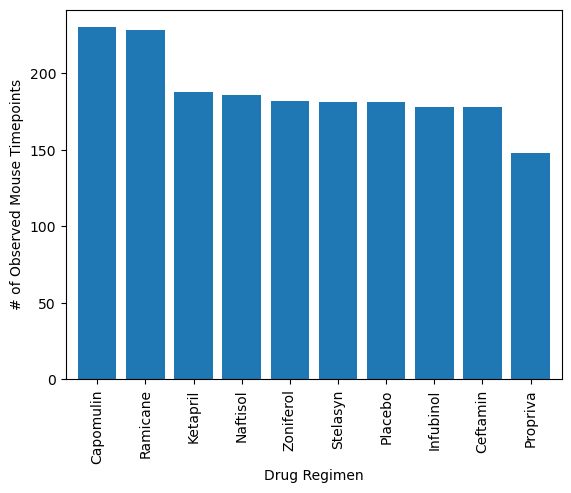

In [10]:
# Create the bar chart using the Pandas DataFrame.plot() method
regimen_count.plot(kind="bar", width=0.8)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

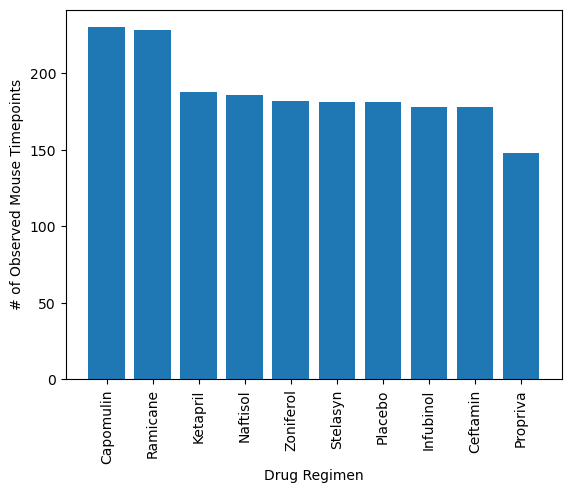

In [11]:
# Using Matplotlib's pyplot methods
plt.bar(regimen_count.index, regimen_count)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation=90)
plt.show()


In [12]:
# Count the number of female and male mice
gender_counts = cleaned_data["Sex"].value_counts()
gender_counts

Male      958
Female    922
Name: Sex, dtype: int64

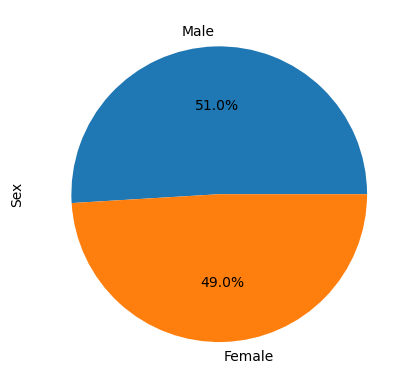

In [13]:
# Create the first pie chart using Pandas DataFrame.plot()
gender_counts.plot(kind="pie", autopct="%1.1f%%", labels=["Male", "Female"])
plt.show()

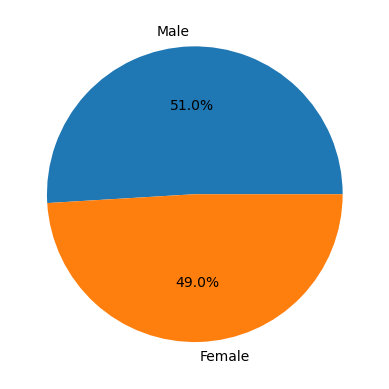

In [14]:
# Create the second pie chart using Matplotlib's pyplot methods
plt.pie(gender_counts, labels=["Male", "Female"], autopct="%1.1f%%")
plt.show()

### Calculate Quartiles, Find Outliers


In [15]:
# Create a grouped DataFrame to get the last (greatest) time point for each mouse
grouped_last_timepoint = cleaned_data.groupby("Mouse ID")["Timepoint"].max()

# Merge the grouped DataFrame with the original cleaned DataFrame to get the final tumor volume for each mouse
final_tumor_volume_df = pd.merge(grouped_last_timepoint, cleaned_data, on=["Mouse ID", "Timepoint"], how="inner")

# List of treatment names
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create an empty list to hold the tumor volume data
tumor_volume_data = []

for treatment in treatment_list:
    treatment_data = final_tumor_volume_df[final_tumor_volume_df["Drug Regimen"] == treatment]
    tumor_volume_data.append(treatment_data["Tumor Volume (mm3)"].values)
tumor_volume_data
# # Calculate the quartiles and IQR for each treatment
for i, treatment in enumerate(treatment_list):
    quartiles = np.percentile(tumor_volume_data[i], [25, 50, 75])
    lower_bound = quartiles[0] - 1.5 * (quartiles[2] - quartiles[0])
    upper_bound = quartiles[2] + 1.5 * (quartiles[2] - quartiles[0])
# # Find potential outliers
    outliers = tumor_volume_data[i][(tumor_volume_data[i] < lower_bound) | (tumor_volume_data[i] > upper_bound)]

    print(f"Treatment: {treatment}")
    print(f"Quartiles: {quartiles}")
    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")
    print(f"Potential Outliers: {outliers}\n")

Treatment: Capomulin
Quartiles: [32.37735684 38.1251644  40.1592203 ]
Lower Bound: 20.70456164999999
Upper Bound: 51.83201549
Potential Outliers: []

Treatment: Ramicane
Quartiles: [31.56046955 36.56165229 40.65900627]
Lower Bound: 17.912664470000003
Upper Bound: 54.30681135
Potential Outliers: []

Treatment: Infubinol
Quartiles: [54.04860769 60.16518046 65.52574285]
Lower Bound: 36.83290494999999
Upper Bound: 82.74144559000001
Potential Outliers: [36.3213458]

Treatment: Ceftamin
Quartiles: [48.72207785 59.85195552 64.29983003]
Lower Bound: 25.355449580000002
Upper Bound: 87.66645829999999
Potential Outliers: []



### Create a Box Plot

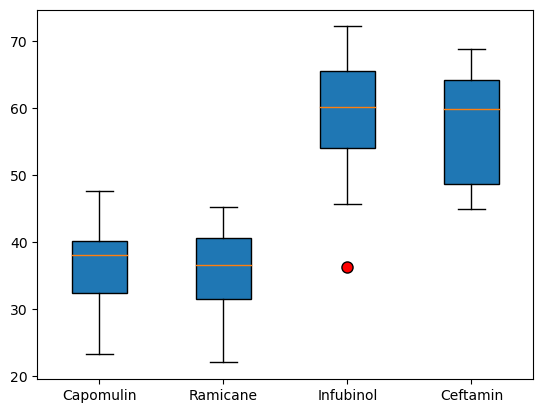

In [16]:
# Create a dictionary to store treatment names as keys and tumor volume data as values
treatment_data_dict = {}
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

for treatment in treatment_list:
    # Filter the final tumor volume DataFrame to get rows corresponding to the current treatment
    treatment_data = final_tumor_volume_df[final_tumor_volume_df["Drug Regimen"] == treatment]
    
    # Store the tumor volume data for the current treatment in the dictionary
    treatment_data_dict[treatment] = treatment_data["Tumor Volume (mm3)"].values

# Customize potential outlier properties
outlier_props = dict(markerfacecolor='red', marker='o', markersize=8, linestyle='none')

# Generate the box plot 

plt.boxplot(treatment_data_dict.values(), labels=treatment_data_dict.keys(), patch_artist=True, flierprops=outlier_props)

plt.show()

### Create a Line Plot and a Scatter Plot


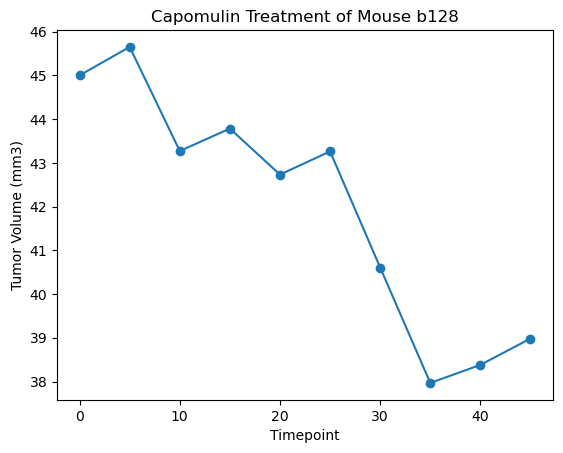

In [17]:
# Select a single mouse treated with Capomulin 
selected_mouse_id = "b128"
selected_mouse_data = cleaned_data[cleaned_data["Mouse ID"] == selected_mouse_id]

# Generate the line plot
plt.plot(selected_mouse_data["Timepoint"], selected_mouse_data["Tumor Volume (mm3)"], marker='o')
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title(f"Capomulin Treatment of Mouse {selected_mouse_id}")
plt.show()


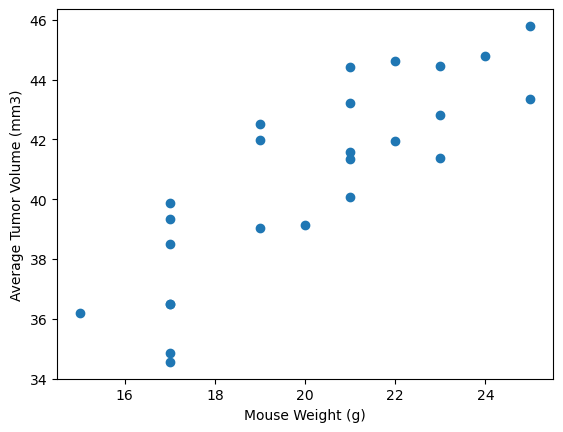

In [18]:
# Scatter plot of mouse weight versus average observed tumor volume for the Capomulin treatment regimen
capomulin_data = cleaned_data[cleaned_data["Drug Regimen"] == "Capomulin"]
average_tumor_volume_by_weight = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
mouse_weight = capomulin_data.groupby("Mouse ID")["Weight (g)"].mean()

plt.scatter(mouse_weight, average_tumor_volume_by_weight, marker='o')
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

### Calculate Correlation and Regression


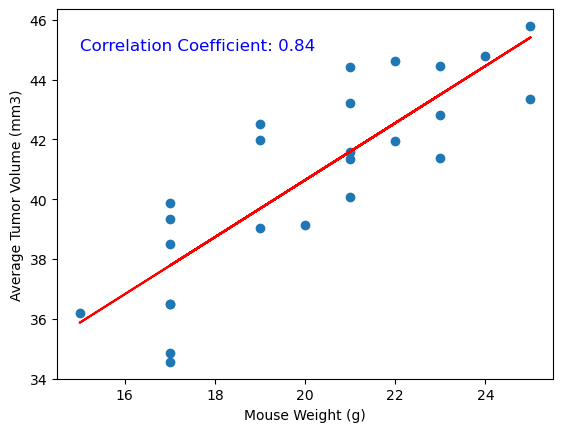

In [19]:
# Scatter plot of mouse weight versus average observed tumor volume for the Capomulin treatment regimen
capomulin_data = cleaned_data[cleaned_data["Drug Regimen"] == "Capomulin"]
average_tumor_volume_by_weight = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
mouse_weight = capomulin_data.groupby("Mouse ID")["Weight (g)"].mean()

# Generate the scatter plot
plt.scatter(mouse_weight, average_tumor_volume_by_weight, marker='o')
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

# Calculate the correlation coefficient
correlation_coefficient = st.pearsonr(mouse_weight, average_tumor_volume_by_weight)[0]
correlation_text = f"Correlation Coefficient: {correlation_coefficient:.2f}"
plt.text(15, 45, correlation_text, fontsize=12, color='blue')

# Calculate the linear regression model
slope, intercept, r_value, p_value, std_err = st.linregress(mouse_weight, average_tumor_volume_by_weight)
# Create the regression line
regression_line = slope * mouse_weight + intercept

# Plot the linear regression model on top of the scatter plot
plt.plot(mouse_weight, regression_line, color='red', label='Regression Line')

plt.show()